## Tutorial 10. ANOVA and Tukey test


Created by Emanuel Flores-Bautista 2019.  All content contained in this notebook is licensed under a [Creative Commons License 4.0](https://creativecommons.org/licenses/by/4.0/). The code is licensed under a [MIT license](https://opensource.org/licenses/MIT).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import TCD19_utils as TCD

TCD.set_plotting_style_2()

#Magic command to enable plotting inside notebook
%matplotlib inline

#Magic command to enable svg format in plots
%config InlineBackend.figure_format = 'svg'


The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable. It essentially answers the question: do any of the group means differ from one another?

Assumptions: normal distributions.

$H_{0}$that the means of a given set of normally distributed populations, all have the same standard deviation, are equal. 

$H_{1}$ at least one of the distributions have a different standard deviation.

F-statistic = variance between groups / variance within groups

In [3]:
df = sns.load_dataset('exercise')

In [4]:
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [7]:
np.unique(df.kind.values)

array(['rest', 'running', 'walking'], dtype=object)

In [9]:
cols = ['diet', 'pulse', 'time', 'kind']
df = df[cols]

In [10]:
df.head()

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest


In [16]:
rest = df[df['kind'] =='rest'].pulse.values
walk = df[df['kind'] =='walking'].pulse.values
run = df[df['kind'] =='running'].pulse.values

In [17]:
rest[:5]

array([85, 85, 88, 90, 92])

In [18]:
stats.f_oneway(rest, walk, run)

F_onewayResult(statistic=31.987037991079976, pvalue=3.8621927859194524e-11)

In [20]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups  

In [24]:
pulses = df.pulse.values

activity = df.kind.values

group1,group2,meandiff,lower,upper,reject
rest,running,22.2333,15.2094,29.2573,True
rest,walking,4.3667,-2.6573,11.3906,False
running,walking,-17.8667,-24.8906,-10.8427,True


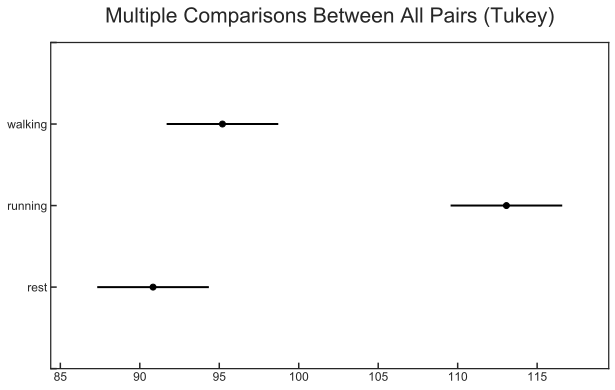

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=pulses,     # Data
                          groups=activity,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary()# See test summary

https://medium.com/@rrfd/f-tests-and-anovas-examples-with-the-iris-dataset-fe7caa3e21d0